<a href="https://colab.research.google.com/github/sachinmotwani20/SP_Python/blob/master/Ch3%2CChirpSpectralAnalysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!wget https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py

--2020-03-27 19:12:56--  https://github.com/AllenDowney/ThinkDSP/raw/master/code/thinkdsp.py
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py [following]
--2020-03-27 19:13:02--  https://raw.githubusercontent.com/AllenDowney/ThinkDSP/master/code/thinkdsp.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 46887 (46K) [text/plain]
Saving to: ‘thinkdsp.py’

thinkdsp.py         100%[===================>]  45.79K  --.-KB/s    in 0.02s   

2020-03-27 19:13:02 (1.85 MB/s) - ‘thinkdsp.py’ saved [46887/46887]



In [0]:
import thinkdsp 
from  thinkdsp import Chirp

#Chirp
***Chirp***: Signal with linearly-increasing frequency.

Signals so far don't change (wrt frequency) over time.
But most sounds in nature (like speech sound) do.

In [4]:
#Chirp is a function in thinkdsp
signal = Chirp(start = 220, end = 880)
wave1 = signal.make_wave(duration=2)
wave1.make_audio()

Here's what= waveform looks like near the beginning.

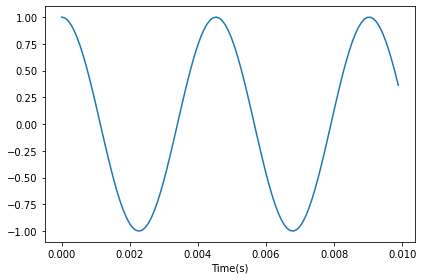

In [5]:
from thinkdsp import decorate

wave1.segment(start= 0, duration=0.01).plot()
decorate(xlabel='Time(s)')

And near the end.

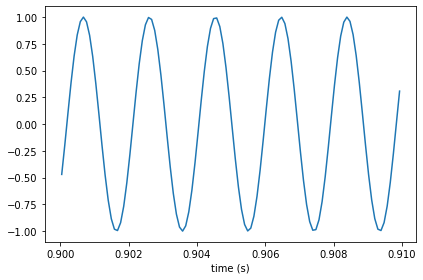

In [6]:
wave1.segment(start=0.9, duration = 0.01).plot()
decorate(xlabel='time (s)')

Here is an exponential chirp with the same frequency range & duration.


In [7]:
from thinkdsp import ExpoChirp

signal = ExpoChirp(start = 220, end=880)
wave2 = signal.make_wave(duration = 2 )
wave2.make_audio()

#Leakage
Spectral leakage is when some of the energy at one frequency appears at another frequency (usually nearby).

Let's look at the effect of leakage on a sine signal (which only contains one frequency component).

In [0]:
from thinkdsp import SinSignal
signal = SinSignal(freq = 440)

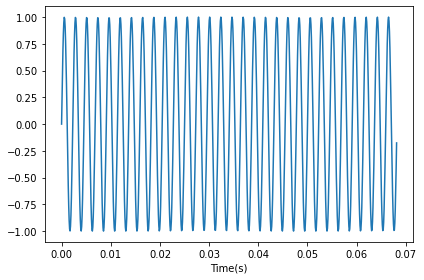

In [9]:
duration = signal.period*30
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time(s)')

If the duration is an integer multiple of the period, the beginning and end of the segment line up, and we get minimal leakage.

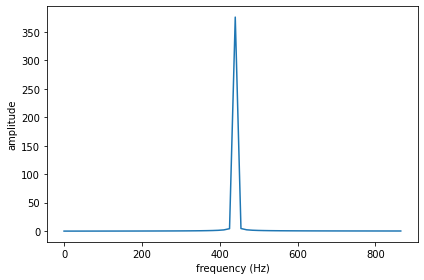

In [10]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='frequency (Hz)', ylabel = 'amplitude')

If the duration is not a multiple of aperiod, the leakage is pretty bad.

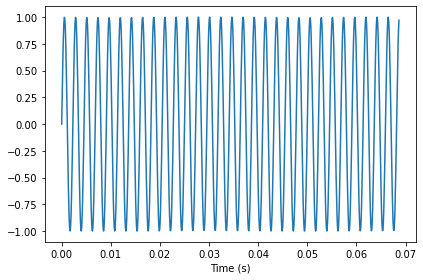

In [11]:
duration = signal.period*30.25
wave = signal.make_wave(duration)
wave.plot()
decorate(xlabel='Time (s)')

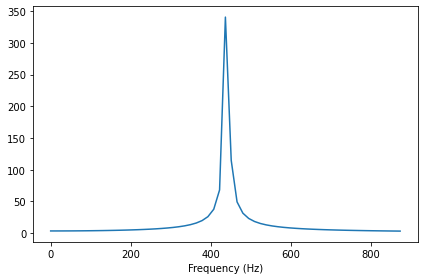

In [12]:
spectrum = wave.make_spectrum()
spectrum.plot(high=880)
decorate(xlabel='Frequency (Hz)')

#Windowing
It helps; but  reduces the total energy.

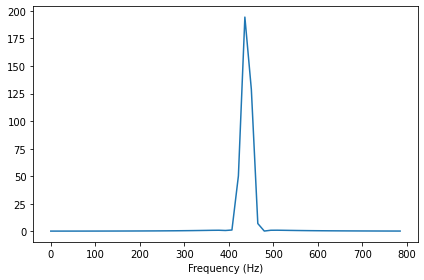

In [13]:
wave.hamming()
spectrum = wave.make_spectrum()
spectrum.plot(high=800)
decorate(xlabel='Frequency (Hz)')

#Spectrogram 
*   A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.

*   It tells you about both: about the frequencies & how they are varing over time.

*   It breaks the signal into small chunks & finds the Fourier Transform of each of these.


If you blindly compute the DFT of a non-periodic segment, you get ***motion blur***.

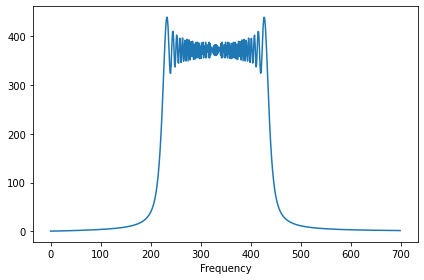

In [14]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1)
spectrum = wave.make_spectrum()
spectrum.plot(high = 700)
decorate(xlabel='Frequency')

It tells us that the signal has equal amouts of energy for most of the frequencies. It doesn't give us any info about how the various frequency components are changing with time.

In [0]:
def plot_spectrogram(wave, seg_length):
    """A spectrogram is a visualization of a short-time DFT that lets you see how the spectrum varies over time.
    """
    spectrogram = wave.make_spectrogram(seg_length)
    print('Time resolution (s)', spectrogram.time_res)
    print('Frequency resolution (Hz)', spectrogram.freq_res)
    spectrogram.plot(high=700)
    decorate(xlabel='Time(s)', ylabel='Frequency (Hz)')


Time resolution (s) 0.046439909297052155
Frequency resolution (Hz) 21.533203125


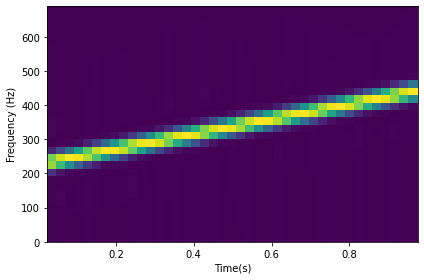

In [16]:
signal = Chirp(start=220, end=440)
wave = signal.make_wave(duration=1, framerate=11025)
plot_spectrogram(wave, 512)

If you increase length, you get better frequency resolution, worse time resolution.

Time resolution (s) 0.09287981859410431
Frequency resolution (Hz) 10.7666015625


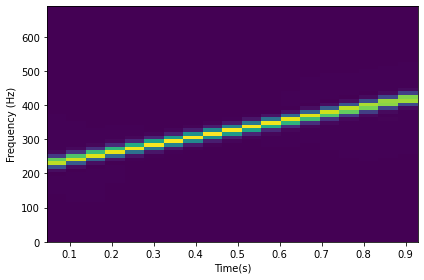

In [17]:
plot_spectrogram(wave, 1024)

If you decrease the segment length, you get better time resolution, worse frequency resolution.

Time resolution (s) 0.023219954648526078
Frequency resolution (Hz) 43.06640625


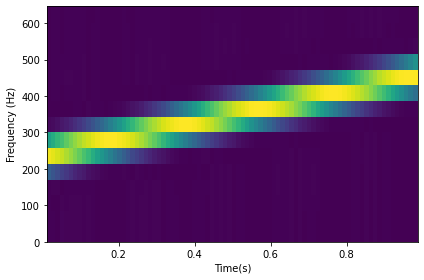

In [18]:
plot_spectrogram(wave, 256)

#Gabor Limit

*   The tradeoff between time & frequency resolution.

*   You can either have precision in time or in frequency. You cannot have both.

*   Graphically, the area of the individual cells is constant: low & wide or tall & shrunk.


#Interactive Spectrogram

In [19]:
from ipywidgets import interact, interactive, fixed
import ipywidgets as widgets

slider = widgets.IntSlider(min=128, max=4096, value=100, step=128)
interact(plot_spectrogram, wave=fixed(wave), seg_length=slider);

interactive(children=(IntSlider(value=128, description='seg_length', max=4096, min=128, step=128), Output()), …

Q. How does the spectrogram of a sawtooth chirp look like?

A. https://github.com/AllenDowney/ThinkDSP/blob/master/code/chap03soln.ipynb

Spectrogram: Frequencies tend to phase out as harmonics.

Listen to it: sounds like an alarm. (reverse discovery) 


#Bird Chirp to Spectrogram Maching Game

https://academy.allaboutbirds.org/features/bird-song-hero/bird-song-hero-tutorial

#Interactive Spectrum of a Chirp

The following interaction lets you customize the Eye of Sauron as you vary the start and end frequency of the chirp.

In [0]:
def eye_of_sauron(start, end):
    """Plots the spectrum of a chirp.
    
    start: initial frequency
    end: final frequency
    """
    signal =  Chirp(start=start, end=end)
    wave = signal.make_wave(duration=0.5)
    spectrum = wave.make_spectrum()
    
    spectrum.plot(high=1200)
    decorate(xlabel='Frequency (Hz)', ylabel='Amplitude')

In [21]:
slider1 = widgets.FloatSlider(min=100, max=1000, value=100, step=50)
slider2 = widgets.FloatSlider(min=100, max=1000, value=200, step=50)
interact(eye_of_sauron, start=slider1, end=slider2);

interactive(children=(FloatSlider(value=100.0, description='start', max=1000.0, min=100.0, step=50.0), FloatSl…